In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path, WindowsPath
import json


basedir = Path(r"C:\Users\bapun\Documents\Codes\Data\ipl_male_json")

files = sorted(basedir.glob("*.json"))

In [ ]:
def get_df(data):
    team_info = []
    innings_info = []
    over_info = []
    ball_info = []
    bowler_info = []
    batter_info = []
    nonstriker_info = []
    batterruns_info = []
    totalruns_info = []
    extraruns_info = []
    wide_info = []
    noball_info = []

    for i1 in range(len(data["innings"])):
        # data['innings'][0]['overs'][19]['deliveries']
        inning_data = data["innings"][i1]["overs"]
        team_name = data["innings"][i1]["team"]

        for over_data in inning_data:
            over_id = over_data["over"]
            ball_data = over_data["deliveries"]
            ball_i = 1
            for ball in ball_data:

                wide = 0
                noball = 0
                team_info.append(team_name)
                innings_info.append(i1)
                over_info.append(over_id)
                ball_info.append(ball_i)
                bowler_info.append(ball["bowler"])
                batter_info.append(ball["batter"])
                nonstriker_info.append(ball["non_striker"])
                batterruns_info.append(ball["runs"]["batter"])
                extraruns_info.append(ball["runs"]["extras"])
                totalruns_info.append(ball["runs"]["total"])

                if "extras" in ball.keys():
                    if "wides" in ball["extras"].keys():
                        wide = 1
                    elif "noballs" in ball["extras"].keys():
                        noball = 1
                    else:
                        ball_i += 1

                else:
                    ball_i += 1

                noball_info.append(noball)
                wide_info.append(wide)

    df = pd.DataFrame(
        dict(
            team_name=team_info,
            inning=innings_info,
            over=over_info,
            ball=ball_info,
            bowler=bowler_info,
            batter=batter_info,
            non_striker=nonstriker_info,
            wide=wide_info,
            noball=noball_info,
            batter_runs=batterruns_info,
            extra_runs=extraruns_info,
            total_runs=totalruns_info,
        )
    )

    return df

In [ ]:
matches_df = []
for fp in files:
    with open(fp, "r") as f:
        match_data = json.load(f)
        matches_df.append(get_df(match_data))

matches_df = pd.concat(matches_df, ignore_index=True)

In [ ]:
matches_df[matches_df["team_name"] == "Mumbai Indians"]["batter"].to_list()

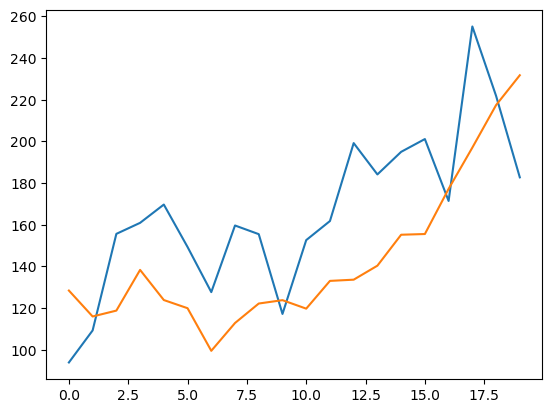

In [38]:
import matplotlib.pyplot as plt

# players = ["Kohli", "Dhoni", "RG Sharma", "villiers"]
players = ["Gayle", "kohli"]

for player in players:
    vk_data = matches_df[
        matches_df["batter"].str.contains(player, case=False)
    ].reset_index()


    vk_data_hit = vk_data[(vk_data["wide"] == 0)]
    # print(vk_data_hit.head(10))

    n_balls = (
        vk_data_hit.groupby(["over"])
        .count()
        .reset_index()[["over", "ball", "batter_runs"]]
    )
    total_runs = (
        vk_data_hit.groupby(["over"])
        .sum(numeric_only=True)
        .reset_index()[["over", "batter_runs"]]
    )

    total_runs["ball"] = n_balls["ball"]

    total_runs["strike_rate"] = (total_runs["batter_runs"] / total_runs["ball"]) * 100
    # total_runs = total_runs[total_runs["ball"] >= 30]

    plt.plot(total_runs["over"], total_runs["strike_rate"])